In [22]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [23]:
num_frames = 100
r_vals = np.linspace(0.0, 10.0, 500)
r_vals[0] = 1e-10
M_vals = np.linspace(0, 25.0, len(r_vals))
M_vals[0] = 1e-10
print(f"shape of r_vals : {r_vals.shape}")
print(f"shape of M_vals : {M_vals.shape}")
# load the data from P.txt
# the data is of shape (time_frames, r_vals.shape[0])
P = np.loadtxt("P.txt")
print(f"shape of P : {P.shape}")

shape of r_vals : (500,)
shape of M_vals : (500,)
shape of P : (100, 500)


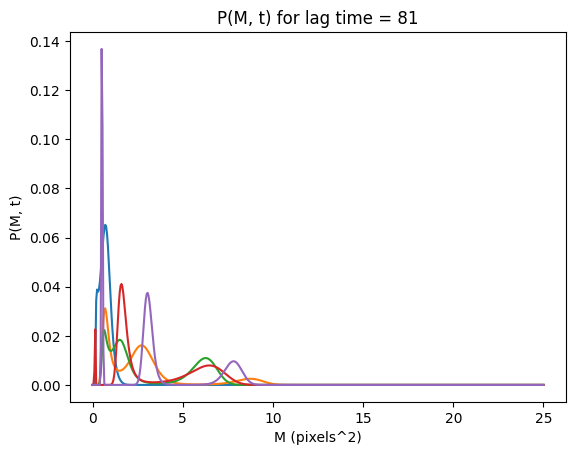

In [24]:
# plot P
for i in range(1, num_frames, 20):
    plt.plot(M_vals, P[i, :])
    plt.xlabel("M (pixels^2)")
    plt.ylabel("P(M, t)")
    plt.title(f"P(M, t) for lag time = {i}")
    # plt.show()
plt.show()

In [25]:
# dump the images for each lag time into a folder
for i in range(1, num_frames, 1):
    plt.plot(M_vals, P[i, :])
    plt.xlabel("M (pixels^2)")
    plt.ylabel("P(M, t)")
    plt.title(f"P(M, t) for lag time = {i}")
    plt.xlim(0, 25)
    plt.ylim(0, 0.15)
    plt.savefig(f"p_m_t/P_{i}.png")
    plt.close()

In [26]:
# load the data from G_pred.txt
# the data is of shape (time_frames, r_vals.shape[0])
G_pred = np.loadtxt("G_pred.txt")
print(f"shape of G_pred : {G_pred.shape}")

shape of G_pred : (100, 500)


In [27]:
# dump the images for each lag time into a folder
for i in range(1, num_frames, 1):
    plt.plot(r_vals, G_pred[i, :] * 2 * np.pi * r_vals)
    plt.xlabel("r (pixels)")
    plt.ylabel("G(r)")
    plt.title(f"G(r) for lag time = {i}")
    # plt.xlim(0, 10)
    plt.ylim(0, 1.1)
    plt.savefig(f"g_pred/G_{i}.png")
    plt.close()

In [28]:
# load the data from van_hove.txt
# the data is of shape (time_frames, r_vals.shape[0])
van_hove = np.loadtxt("van_hove.txt")
print(f"shape of van_hove : {van_hove.shape}")

shape of van_hove : (100, 500)


In [30]:
# apply fft to van_hove to get van_hove in frequency domain
van_hove_freq = fft.fft(van_hove, axis=0)
print(f"shape of van_hove_freq : {van_hove_freq.shape}")

# save the data to van_hove_freq.txt
np.savetxt("van_hove_freq.txt", van_hove_freq)

shape of van_hove_freq : (100, 500)


In [31]:
# access the real and imaginary parts of van_hove_freq
van_hove_freq_real = np.real(van_hove_freq)
van_hove_freq_imag = np.imag(van_hove_freq)
print(f"shape of van_hove_freq_real : {van_hove_freq_real.shape}")
print(f"shape of van_hove_freq_imag : {van_hove_freq_imag.shape}")

shape of van_hove_freq_real : (100, 500)
shape of van_hove_freq_imag : (100, 500)


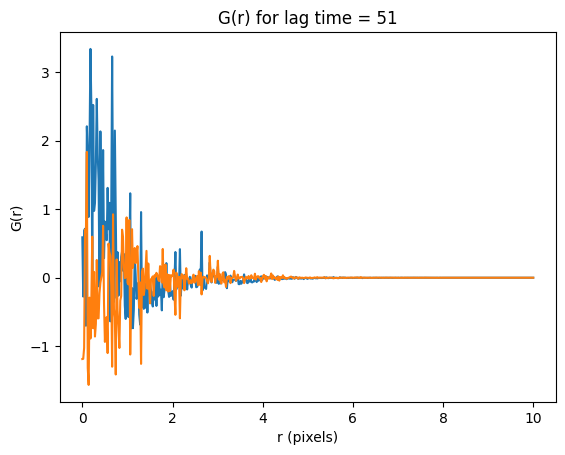

In [41]:
# visualise the real part of van_hove_freq
num_freqs = van_hove_freq_real.shape[0]
for i in range(1, num_frames, 50):
    plt.plot(r_vals, van_hove_freq_real[i, :])
    plt.xlabel("r (pixels)")
    plt.ylabel("G(r)")
    plt.title(f"G(r) for lag time = {i}")    
plt.show()